<a href="https://colab.research.google.com/github/anamilanezi/anamilanezi/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚲 Analysis goals:

* Mean of ride_length
* Max ride_length
* Min ride_lenght
* Mode of day of week
* Replace weekday names for numbers
* Average ride_length for members and casual riders
* Average ride_length by day of week
* Number of rides for users by day_of_week

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

out = display(progress(0, 100), display_id=True)
for ii in range(101):
    time.sleep(0.02)
    out.update(progress(ii, 100))

def loadbar():
  out = display(progress(0, 100), display_id=True)
  for ii in range(101):
      time.sleep(0.02)
      out.update(progress(ii, 100))

# Importing modules and CSV files

To prepare, process and analysis the data, I'm going to use the following libraries and packages:
* [Glob](https://docs.python.org/3/library/glob.html): finds all the pathnames matching a specified pattern according to the rules used by the Unix shell;
* [Pandas](https://pandas.pydata.org/): data cleaning, manipulation, operations and analysis
* [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/): data visuals

In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import timedelta


In [3]:
# Get CSV files list from a folder
path = '/content/drive/MyDrive/Colab Notebooks/Google Capstone Project/data/raw_data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df = pd.concat(df_list, ignore_index=True)

# ✅ Data preparation and cleaning

## Cheking for NaN Values

`.count()` gives the number of non-NA cells for each column or row.

In [4]:
big_df.count()

ride_id               5900385
rideable_type         5900385
started_at            5900385
ended_at              5900385
start_station_name    5064367
start_station_id      5064370
end_station_name      5008282
end_station_id        5008282
start_lat             5900385
start_lng             5900385
end_lat               5895011
end_lng               5895011
member_casual         5900385
dtype: int64

In [5]:
columns = list(big_df.columns)

for column in columns:
  total_nan = big_df[column].isna().sum()
  print(f"[{column}] has {total_nan} NaN values")


[ride_id] has 0 NaN values
[rideable_type] has 0 NaN values
[started_at] has 0 NaN values
[ended_at] has 0 NaN values
[start_station_name] has 836018 NaN values
[start_station_id] has 836015 NaN values
[end_station_name] has 892103 NaN values
[end_station_id] has 892103 NaN values
[start_lat] has 0 NaN values
[start_lng] has 0 NaN values
[end_lat] has 5374 NaN values
[end_lng] has 5374 NaN values
[member_casual] has 0 NaN values


Since the total of NaN values for the coluns `'start_station_name'`, `'start_station_id'`, `'end_station_name'` and `end_station_id'` represents 14.17% of rows, I'll maintain these records for the analysis. For the most part there is latitude and longitude values for both start and end points, those should give us enough information, and the records with NaN values for latitude and longitude (0.09% of total records) will be deleted.

In [6]:
df = big_df[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual']]

In [7]:
df = df.dropna()

In [8]:
df.count()

ride_id          5900385
rideable_type    5900385
started_at       5900385
ended_at         5900385
member_casual    5900385
dtype: int64

In [9]:
columns = list(df.columns)

for column in columns:
  total_nan = df[column].isna().sum()
  print(f"[{column}] has {total_nan} NaN values")

[ride_id] has 0 NaN values
[rideable_type] has 0 NaN values
[started_at] has 0 NaN values
[ended_at] has 0 NaN values
[member_casual] has 0 NaN values


## Finding duplicates:

In [10]:
df.duplicated().any()

False

## Convert date column from string to datetime

In [11]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [13]:
print(df.dtypes)

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual            object
dtype: object


## Creating new columns from date information

### Get day of week each ride started and turning into numerical column

In [57]:
# Get the day of week that each ride started
df['day_of_week'] = df['started_at'].dt.day_name()

In [15]:
# Turning day of week into a numerical column
import calendar
days = {name: i + 1 for i, name in enumerate(calendar.day_name)}
print(days)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}


In [58]:
df['int_day_of_week'] = df['day_of_week'].apply(lambda x: days[x] if x == x else x)

In [70]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [59]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,int_month,month,hour,ride_length,ride_length_minutes,int_day_of_week
634177,B8BA05857944F445,electric_bike,2021-07-01 00:00:22,2021-07-01 00:04:51,member,Thursday,7,July,0,0 days 00:04:29,4.48,4
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:30,2021-07-01 00:46:58,casual,Thursday,7,July,0,0 days 00:46:28,46.47,4
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:42,2021-07-01 00:10:25,casual,Thursday,7,July,0,0 days 00:09:43,9.72,4
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:47,2021-07-01 00:28:11,casual,Thursday,7,July,0,0 days 00:27:24,27.40,4
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:53,2021-07-01 00:16:43,casual,Thursday,7,July,0,0 days 00:15:50,15.83,4


### Create a column for month

In [19]:
df['int_month'] = df['started_at'].apply(lambda x: x.month)

In [20]:
df['month'] = df['started_at'].dt.month_name()

In [21]:
months_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]

In [22]:
# Create a dictionary for months:

month_names = {(i): name for i, name in enumerate(calendar.month_name) if i != 0}
print(month_names)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [23]:
df = df.sort_values(by=['started_at'])

### Create a column for the hour of day each ride started

In [24]:
df['hour'] = df['started_at'].apply(lambda x: x.hour)

### Calculate the ride length and turning into minutes

In [25]:
# Calculate the ride length 
df['ride_length'] = df['ended_at'] - df['started_at']

In [26]:
# Transform in minutes
df['ride_length_minutes'] = (df['ride_length']/timedelta(minutes=1)).round(decimals = 2)

## Getting a statistical overview using `.describe()`, treating inconsistent values and outliers

Without giving the data any treatment we have:
* The minimum ride length for all users was equal to -1 days +21:42:35	
* The maximum ride length for all users was equal to 34 days 02:27:09
* The median ride length for all users was equal to 00:11:10
* The most frequent day of rides was Saturday
* The month with more rides was July 2021


In [27]:
df[['ride_length', 'ride_length_minutes', ]].describe()

,ride_length,ride_length_minutes
count,5900385,5.900385e+06
mean,0 days 00:20:16.942832713,2.028238e+01
std,0 days 02:35:13.345907040,1.552224e+02
min,-1 days +21:42:35,-1.374200e+02
25%,0 days 00:06:17,6.280000e+00
50%,0 days 00:11:10,1.117000e+01
75%,0 days 00:20:12,2.020000e+01
max,34 days 02:27:09,4.910715e+04


In [28]:
df[['day_of_week', 'month', 'started_at']].describe()

,day_of_week
count,5.900385e+06
mean,1.569074e+01
std,8.735715e+00
min,1.000000e+00
25%,8.000000e+00
50%,1.600000e+01
75%,2.300000e+01
max,3.100000e+01


This summary shows us that there is inconsistent records from ride lenght calculated with the time difference between the starting time and ending time of each ride, specially for negative values which in this context are not possible. All negative values represent 0.002% of all data and therefore will be excluded from further analysis.


In [29]:
df[['ride_length_minutes']].query('ride_length_minutes < 0').count()

ride_length_minutes    146
dtype: int64

In [30]:
df = df.query('ride_length_minutes > 0')

Regarding the ouliers, I defined an initial threshold of 1440 minutes (equivalent to 24 hours) for ride length but this is an arbitrary value decided by me. The bike service offers daily plans for casual users and the case study description didn't mention a time limit for any riders, so it's is impossible to assume that any ride longer than 1440 minutes are actually an outlier or a different type of service or condition a user can have. The number of records that are longer than 24 hours representes 0.07% of the total records. Taking into consideration only longer rides (> 1440 minutes), 75% of them are between 1440 - 1500.03 minutes (24 - 25 hours) and casual users are responsible for 88% of them. Since the difference from the threshold defined at first is of one hour only and there's no solid justification to exclude them, I decided to use 1500, equivalent to 25 hours and keep these data.

In [31]:
df[['ride_length_minutes']].query('ride_length_minutes > 1440').count()

ride_length_minutes    4718
dtype: int64

In [32]:
long_rides = df.query('ride_length_minutes > 1440')

In [33]:
long_rides.describe()

,day_of_week,int_month,hour,ride_length,ride_length_minutes
count,4718.000000,4718.000000,4718.000000,4718,4718.000000
mean,16.086053,6.789953,14.340398,2 days 02:14:07.599830436,3014.126927
std,8.614652,2.473469,6.167428,3 days 02:13:43.385909527,4453.723054
min,1.000000,1.000000,0.000000,1 days 00:00:45,1440.750000
25%,9.000000,5.000000,11.000000,1 days 00:59:52,1499.870000
50%,16.000000,6.000000,16.000000,1 days 00:59:55,1499.920000
75%,23.000000,9.000000,19.000000,1 days 01:00:02,1500.030000
max,31.000000,12.000000,23.000000,34 days 02:27:09,49107.150000


In [34]:
long_rides[['rideable_type', 'ride_length_minutes', 'member_casual']].groupby("member_casual").agg('count')

,rideable_type,ride_length_minutes
member_casual,,
casual,4152,4152
member,566,566


In [35]:
df.query('ride_length_minutes < 1500').count()

ride_id                5898271
rideable_type          5898271
started_at             5898271
ended_at               5898271
member_casual          5898271
day_of_week            5898271
int_month              5898271
month                  5898271
hour                   5898271
ride_length            5898271
ride_length_minutes    5898271
dtype: int64

In [36]:
df = df.query('ride_length_minutes < 1500')

In [37]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,int_month,month,hour,ride_length,ride_length_minutes
634177,B8BA05857944F445,electric_bike,2021-07-01 00:00:22,2021-07-01 00:04:51,member,1,7,July,0,0 days 00:04:29,4.48
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:30,2021-07-01 00:46:58,casual,1,7,July,0,0 days 00:46:28,46.47
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:42,2021-07-01 00:10:25,casual,1,7,July,0,0 days 00:09:43,9.72
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:47,2021-07-01 00:28:11,casual,1,7,July,0,0 days 00:27:24,27.40
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:53,2021-07-01 00:16:43,casual,1,7,July,0,0 days 00:15:50,15.83


# 🎲 Data analysis

## Statistical overview of ride lengths x days of week using boxplot

* Saturday and Sunday are the days with the longest trips, and trips that lasts more than ~45 minutes would be considereted outlies using the IQR 1.5 rules.
* For all the other days of the week, the IQR 1.5 rule stablish outliers between 30 and 40 minutes.


In [38]:
# Color palettes
colors_member_casual = {"member": "#FBB040", "casual": "#506F86" }
sns.set_palette("viridis")



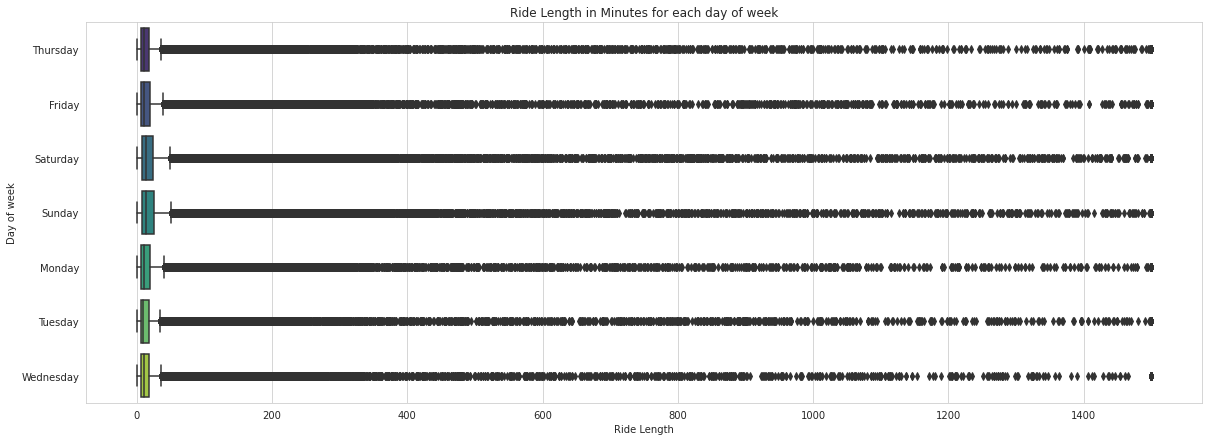

In [71]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["day_of_week"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week")
  grafico.figure.set_size_inches(w=20, h=7)

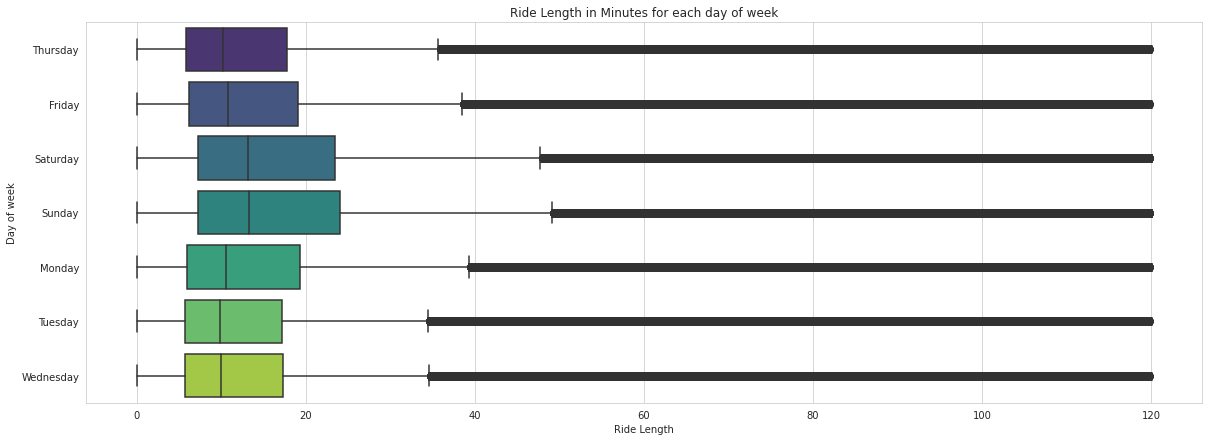

In [ ]:
two_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 120")

with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=two_hour_rides["ride_length_minutes"], y=two_hour_rides["day_of_week"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
  grafico.figure.set_size_inches(w=20, h=7)

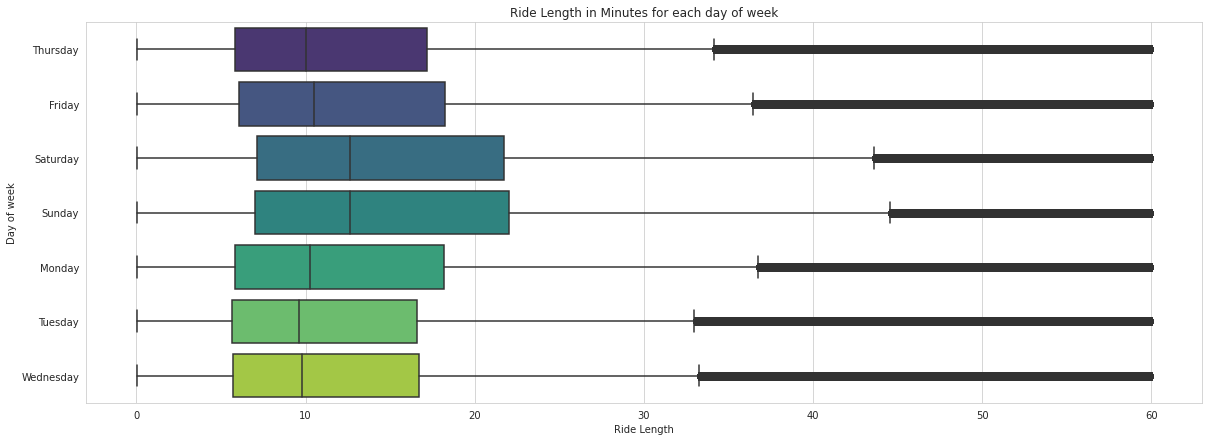

In [ ]:
one_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 60")

with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=one_hour_rides["ride_length_minutes"], y=one_hour_rides["day_of_week"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Ride Length", ylabel="Day of week");
  grafico.figure.set_size_inches(w=20, h=7)

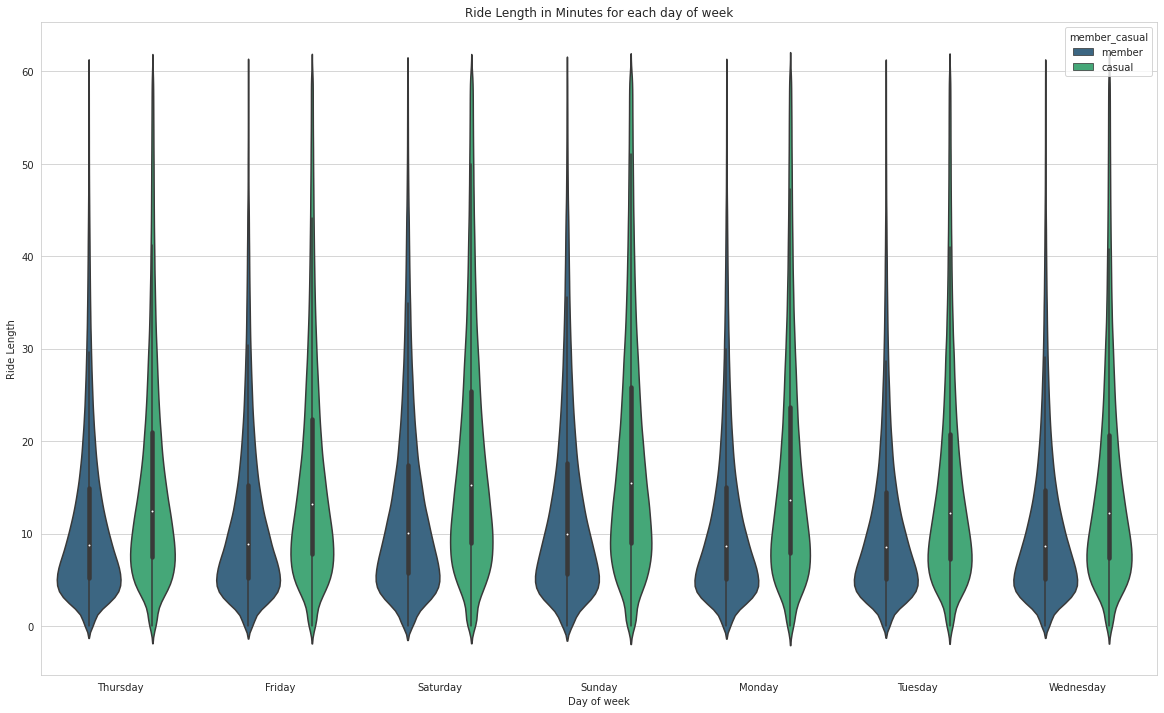

In [ ]:
one_hour_rides = df[["ride_length_minutes", "day_of_week", "member_casual"]].query("ride_length_minutes <= 60")

with sns.axes_style('whitegrid'):

  grafico = sns.violinplot(x=one_hour_rides["day_of_week"], y=one_hour_rides["ride_length_minutes"], hue=one_hour_rides["member_casual"], palette="viridis")
  grafico.set(title="Ride Length in Minutes for each day of week", xlabel="Day of week", ylabel="Ride Length");
  grafico.figure.set_size_inches(w=20, h=12)

## Average ride length and other statistical measures for members/casual riders

* The average ride length for members was **12.98**
* The average ride length for casual users was **26.18** 
* **Saturday** was the most frequent day used by casual riders
* **Thursday** was the most frequent day used by members




In [ ]:
#user_statistics

,count,sum,mean,median,std,max,min,mode,i
member_casual,,,,,,,,,
casual,2556420,66937502.73,26.184079,14.83,64.528897,1499.97,0.02,8.42,18.60
member,3341851,43389541.78,12.983685,9.07,27.360908,1499.97,0.02,4.33,10.48


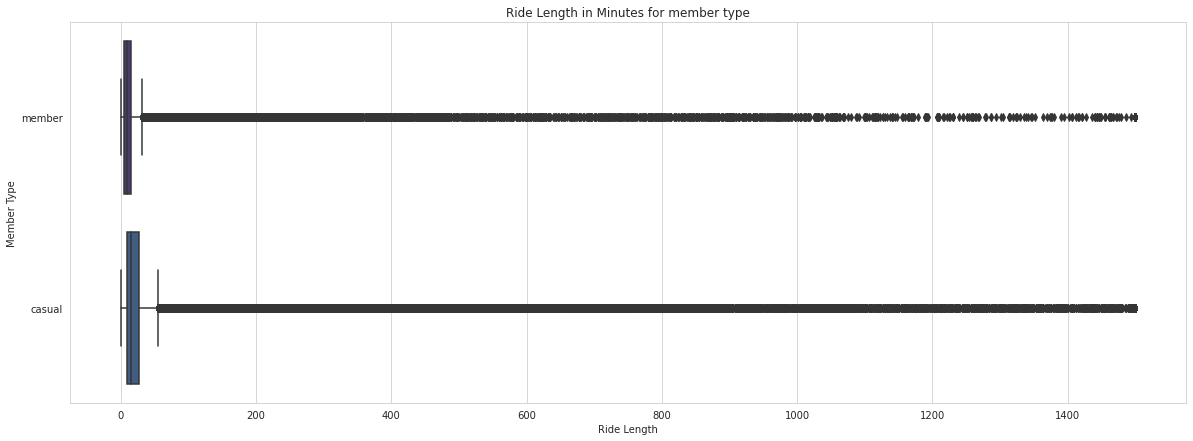

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=df["ride_length_minutes"], y=df["member_casual"])
  grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Member Type");
  grafico.figure.set_size_inches(w=20, h=7)

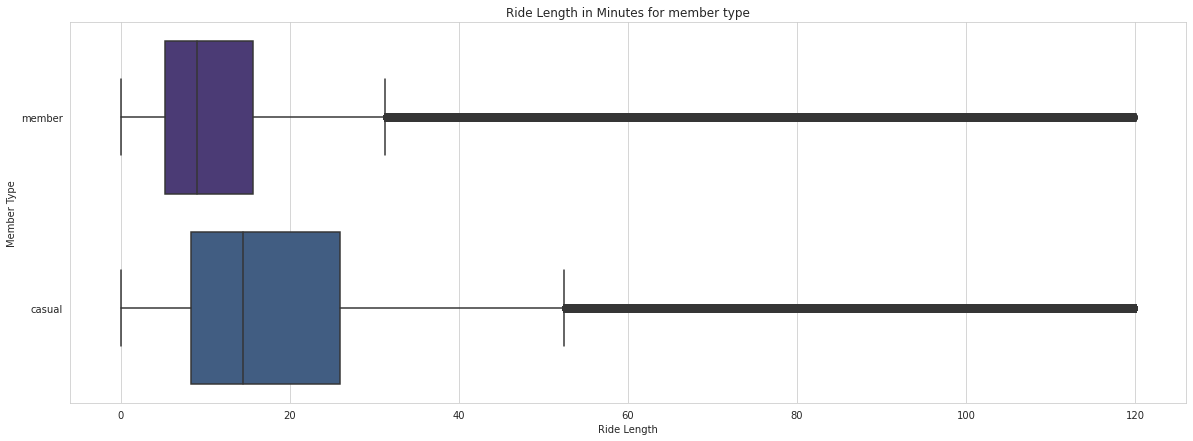

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=two_hour_rides["ride_length_minutes"], y=two_hour_rides["member_casual"])
  grafico.set(title="Ride Length in Minutes for member type", xlabel="Ride Length", ylabel="Member Type");
  grafico.figure.set_size_inches(w=20, h=7)

In [40]:
# Calculating IQR for members and casual users
grouped_df = df[['ride_length_minutes', 'member_casual']].groupby('member_casual')
q1, q3 = grouped_df.quantile(0.25), grouped_df.quantile(0.75)
iqr = q3 - q1
iqr

,ride_length_minutes
member_casual,
casual,18.60
member,10.48


In [ ]:
grouped_member_casual = df[['ride_length_minutes', 'member_casual']].groupby('member_casual').agg(['count', 'sum', 'mean', 'median', 'std', 'max', 'min', pd.Series.mode])


In [ ]:
user_statistics = pd.merge(left=grouped_member_casual, right=iqr, on='member_casual', how="inner")


In [ ]:
user_statistics = user_statistics.rename(lambda x: x[1], axis=1)

In [46]:
user_statistics

,count,sum,mean,median,std,max,min,mode,i
member_casual,,,,,,,,,
casual,2556420,66937502.73,26.184079,14.83,64.528897,1499.97,0.02,8.42,18.60
member,3341851,43389541.78,12.983685,9.07,27.360908,1499.97,0.02,4.33,10.48


### Get mode of day of week for members and casual users

For casual members, saturday is the most frequent day, and for members, it's wednesday

In [82]:
# day_of_week_count_mean = df[['ride_length_minutes', 'member_casual', 'day_of_week']].groupby(['day_of_week', 'member_casual'], as_index=False).agg(['count', 'median'])
day_of_week_count = df[['ride_length_minutes', 'member_casual', 'day_of_week']].groupby(['day_of_week', 'member_casual'], as_index=False).agg('count')


In [83]:
day_of_week_count

,day_of_week,member_casual,ride_length_minutes
0,Friday,casual,362870
1,Friday,member,469221
2,Monday,casual,303769
3,Monday,member,469011
4,Saturday,casual,535198
5,Saturday,member,444123
6,Sunday,casual,466702
7,Sunday,member,398881
8,Thursday,casual,324969
9,Thursday,member,525901


In [80]:
#month_count_mean = df[['ride_length_minutes', 'member_casual', 'month']].groupby(['month', 'member_casual'], as_index=False).agg(['count', 'median'])
month_count = df[['ride_length_minutes', 'member_casual', 'month']].groupby(['month', 'member_casual'], as_index=False).agg('count')


In [81]:
month_count

,month,member_casual,ride_length_minutes
0,April,casual,126287
1,April,member,244820
2,August,casual,412512
3,August,member,391637
4,December,casual,69673
5,December,member,177790
6,February,casual,21390
7,February,member,94190
8,January,casual,18495
9,January,member,85248


## Get the average ride length by each day of week

In [65]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,int_month,month,hour,ride_length,ride_length_minutes,int_day_of_week
634177,B8BA05857944F445,electric_bike,2021-07-01 00:00:22,2021-07-01 00:04:51,member,Thursday,7,July,0,0 days 00:04:29,4.48,4
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:30,2021-07-01 00:46:58,casual,Thursday,7,July,0,0 days 00:46:28,46.47,4
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:42,2021-07-01 00:10:25,casual,Thursday,7,July,0,0 days 00:09:43,9.72,4
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:47,2021-07-01 00:28:11,casual,Thursday,7,July,0,0 days 00:27:24,27.40,4
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:53,2021-07-01 00:16:43,casual,Thursday,7,July,0,0 days 00:15:50,15.83,4


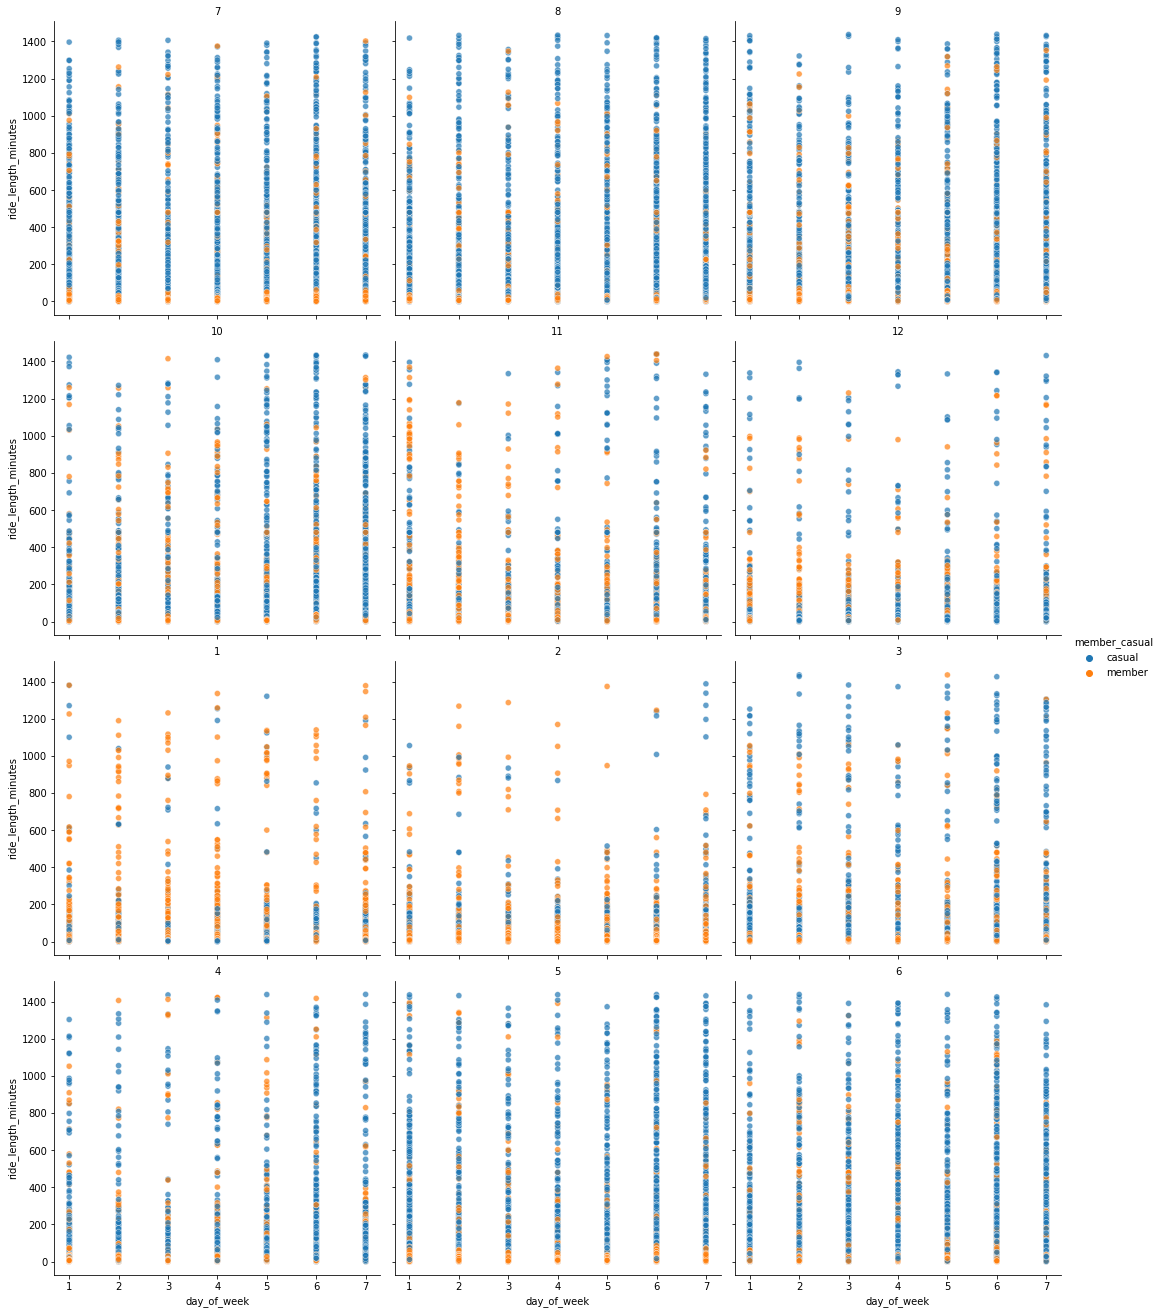

In [ ]:
grafico = sns.relplot(data=df, y='ride_length_minutes', x='day_of_week', hue="member_casual", col="month", col_order=months_order,col_wrap=3, alpha=0.7)
grafico.fig.subplots_adjust(top=.9)
grafico.set_titles(col_template="{col_name}")

In [68]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,int_month,month,hour,ride_length,ride_length_minutes,int_day_of_week
634177,B8BA05857944F445,electric_bike,2021-07-01 00:00:22,2021-07-01 00:04:51,member,Thursday,7,July,0,0 days 00:04:29,4.48,4
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:30,2021-07-01 00:46:58,casual,Thursday,7,July,0,0 days 00:46:28,46.47,4
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:42,2021-07-01 00:10:25,casual,Thursday,7,July,0,0 days 00:09:43,9.72,4
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:47,2021-07-01 00:28:11,casual,Thursday,7,July,0,0 days 00:27:24,27.40,4
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:53,2021-07-01 00:16:43,casual,Thursday,7,July,0,0 days 00:15:50,15.83,4


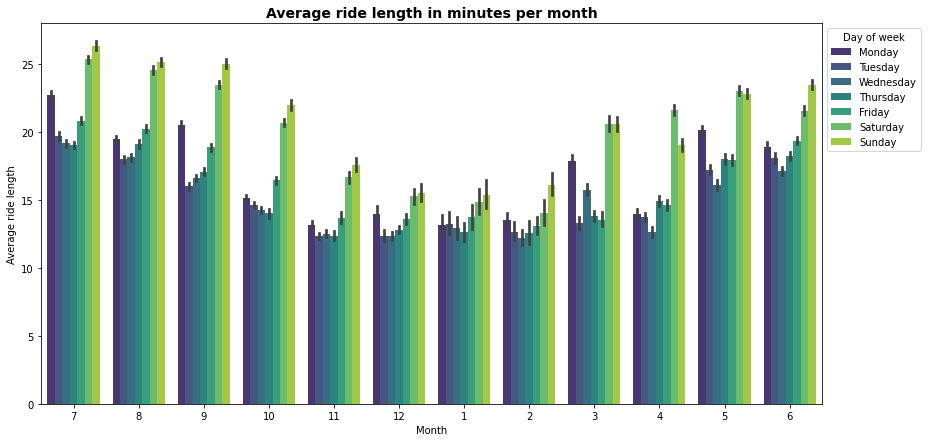

In [73]:
g = sns.barplot(data=df, y='ride_length_minutes', x='int_month', order=months_order, hue="day_of_week", hue_order=days_order, palette="viridis")
g.set_title("Average ride length in minutes per month", fontsize=14, fontweight="bold");
g.set(xlabel="Month", ylabel="Average ride length")
g.figure.set_size_inches(14,7)
plt.legend(title="Day of week", loc = 2, bbox_to_anchor = (1,1))
#plt.rcParams['figure.figsize']=(14,7)
loadbar()

In [50]:
# Creates a list of df for each month (is this really necessary? :P)
months = [df.query(f'int_month == {i}') for i in range(1, 13)]

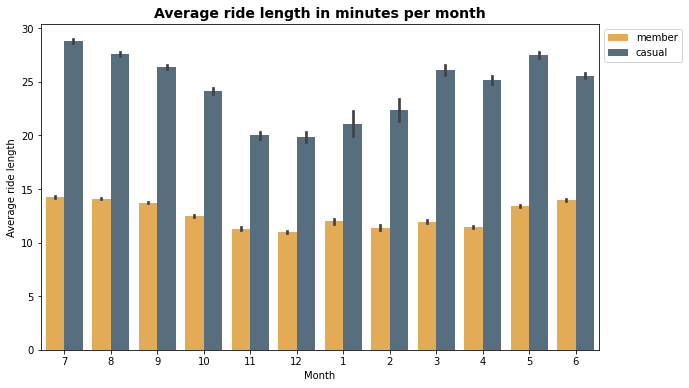

In [76]:
graph = sns.barplot(data=df, x=df["int_month"], y=df["ride_length_minutes"], order=months_order, hue=df["member_casual"], palette=colors_member_casual)
graph.set_title("Average ride length in minutes per month", fontsize=14, fontweight="bold");
graph.set(xlabel="Month", ylabel="Average ride length")
graph.figure.set_size_inches(10,6)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
loadbar()

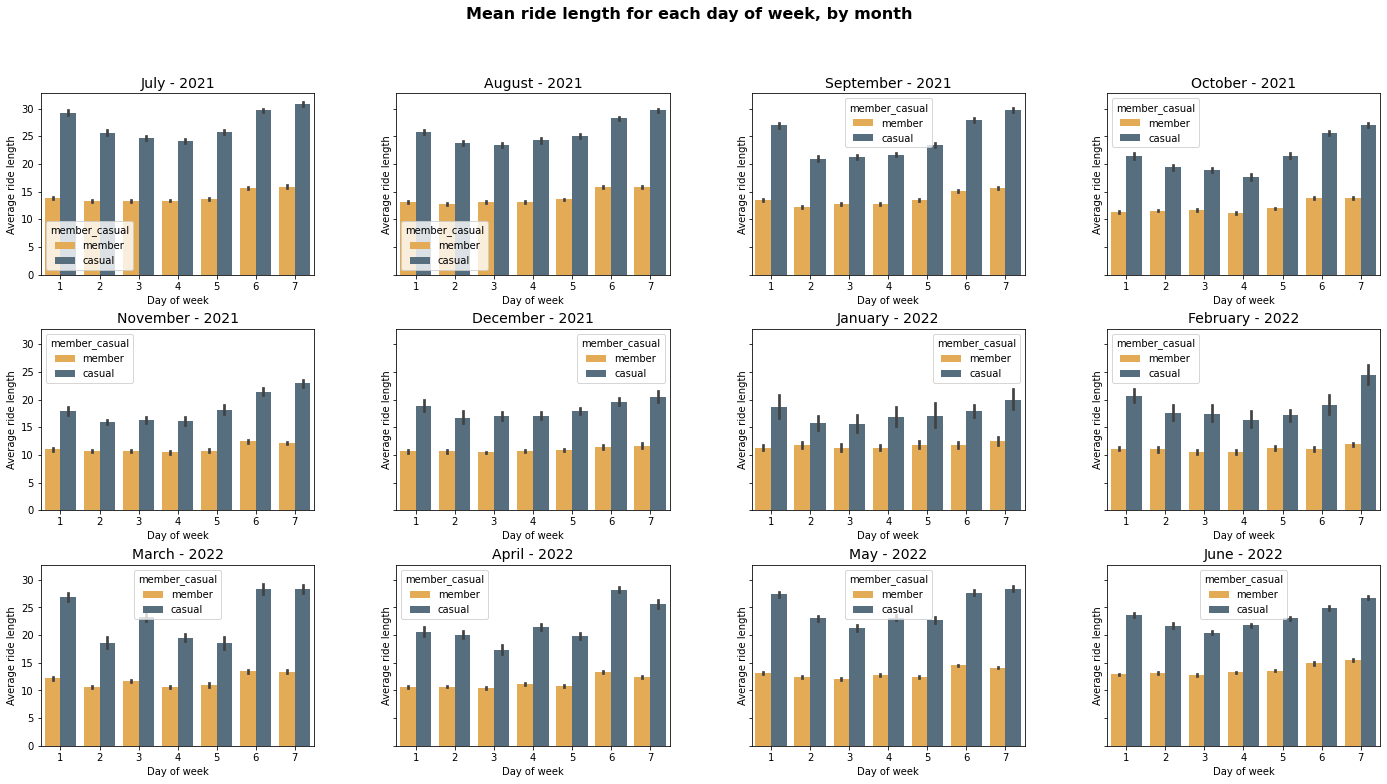

In [ ]:
labels = "Member", "Casual"

fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
fig.suptitle(t='Mean ride length for each day of week, by month', fontsize=16, fontweight="bold")
fig.subplots_adjust(hspace=0.3, wspace=0.3)
# fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

m = 6
year = 2021

for i in range(3):
  for j in range(4):
    g = sns.barplot(ax=axes[i, j], x=months[m]['day_of_week'], y=months[m]['ride_length_minutes'], hue=months[m]['member_casual'], hue_order=["member", "casual"], palette=colors_member_casual)
    g.set(xlabel="Day of week", ylabel="Average ride length")
    axes[i, j].set_title(f"{month_names[m+1]} - {year}", fontsize=14)
    m += 1
    if m == 12:
      m = 0
      year = 2022

### Get the number of rides for user types for each day of the week

In [85]:
day_of_week = df[['day_of_week', 'ride_length', 'member_casual']].groupby(['day_of_week', 'member_casual'], as_index=False).agg('count')

In [86]:
day_of_week.rename(columns={"ride_length": "count"}, inplace=True)

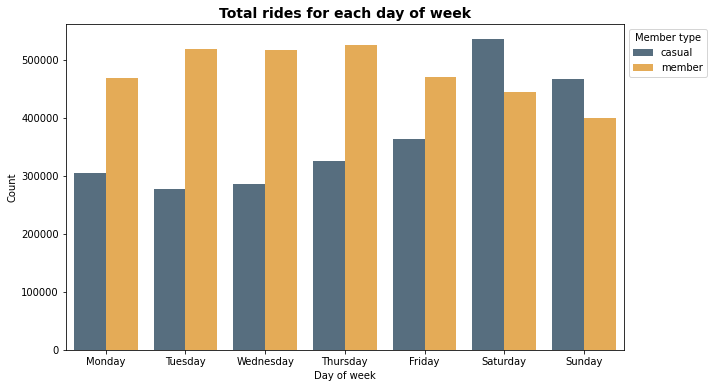

In [91]:
days_count = sns.barplot(data=day_of_week, x='day_of_week', y='count', hue='member_casual', palette=colors_member_casual, order=days_order)
days_count.set_title("Total rides for each day of week", fontsize=14, fontweight="bold");
days_count.set(xlabel="Day of week", ylabel="Count")
days_count.figure.set_size_inches(10,6)
plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

In [ ]:
grouped_months= df[['month', 'ride_length', 'member_casual']].groupby(['month', 'member_casual'], as_index=False).agg('count')
grouped_months.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
grouped_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          24 non-null     int64 
 1   member_casual  24 non-null     object
 2   count          24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


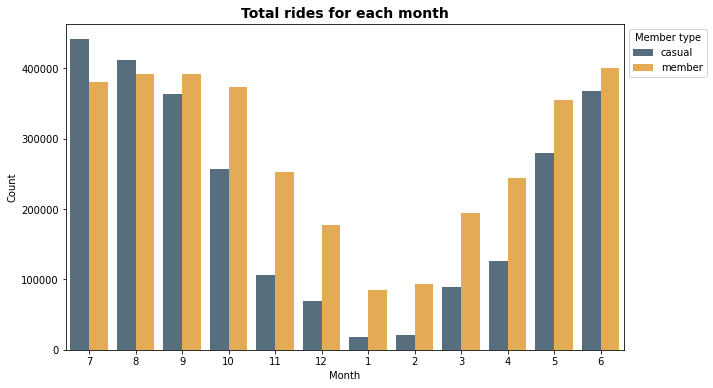

In [ ]:
months_count = sns.barplot(data=grouped_months, x='month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual)
months_count.set_title("Total rides for each month", fontsize=14, fontweight="bold");
months_count.set(xlabel="Month", ylabel="Count")
months_count.figure.set_size_inches(10,6)
plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

In [ ]:
grouped_months_mean= df[['month', 'ride_length_minutes', 'member_casual']].groupby(['month', 'member_casual'], as_index=False).agg('mean')
grouped_months_mean

,month,member_casual,ride_length_minutes
0,1,casual,17.428069
1,1,member,11.615183
2,2,casual,19.579223
3,2,member,11.026867
4,3,casual,24.213971
5,3,member,11.691015
6,4,casual,23.238360
7,4,member,11.335486
8,5,casual,25.530760
9,5,member,13.048955


Text(0.5, 1.0, 'Ride length')

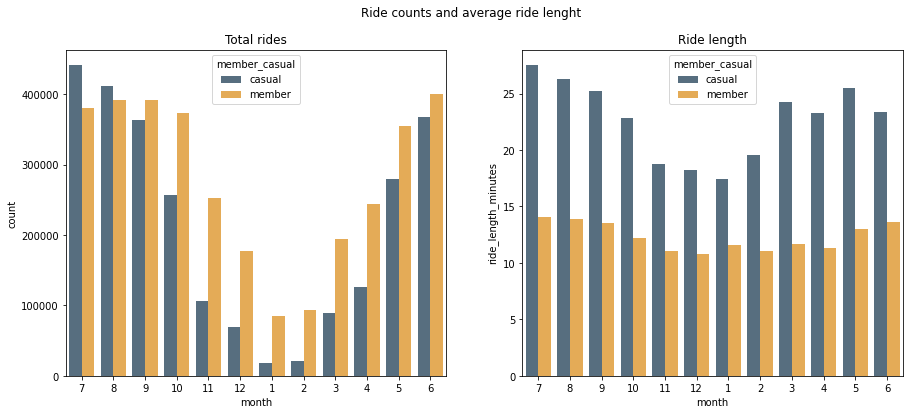

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Ride counts and average ride lenght')
#plt.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0.)

m = 6
year = 2021

sns.barplot(ax=axes[0], data=grouped_months, x='month', y='count', hue='member_casual', order=months_order, palette=colors_member_casual)
axes[0].set_title("Total rides")


sns.barplot(ax=axes[1], data=grouped_months_mean, x='month', y='ride_length_minutes', hue='member_casual', order=months_order, palette=colors_member_casual)
axes[1].set_title("Ride length")

In [ ]:
month_day_of_week = df[['month', 'day_of_week', 'ride_length', 'member_casual']].groupby(['month', 'day_of_week', 'member_casual'], as_index=False).agg('count')
month_day_of_week.rename(columns={"ride_length": "count"}, inplace=True)

In [ ]:
month_day_of_week

,month,day_of_week,member_casual,count
0,1,1,casual,2421
1,1,1,member,13372
2,1,2,casual,2387
3,1,2,member,13751
4,1,3,casual,2375
...,...,...,...,...
163,12,5,member,29480
164,12,6,casual,11064
165,12,6,member,19064
166,12,7,casual,8417


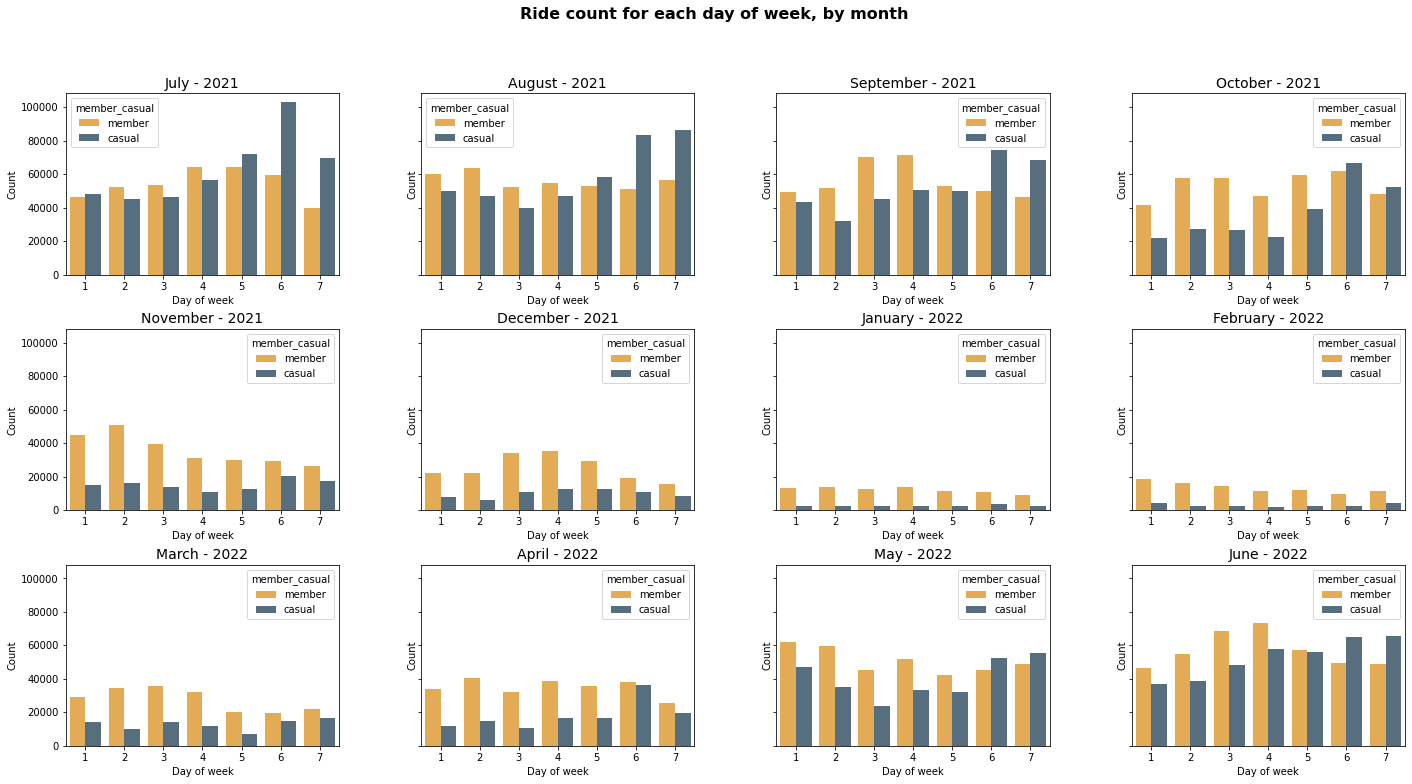

In [ ]:

fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
fig.suptitle(t='Ride count for each day of week, by month', fontsize=16, fontweight="bold")
fig.subplots_adjust(hspace=0.3, wspace=0.3)
# fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

m = 7
year = 2021

for i in range(3):
  for j in range(4):
    month_df = month_day_of_week.query(f'month == {m}')
    gf = sns.barplot(ax=axes[i, j], data=month_df, x='day_of_week', y='count', hue='member_casual', hue_order=["member", "casual"], palette=colors_member_casual)
    gf.set(xlabel="Day of week", ylabel="Count")
    axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
    m += 1
    if m == 13:
      m = 1
      year = 2022

In [78]:
grouped_months_type= df[['month', 'rideable_type', 'member_casual', 'ride_length_minutes']].groupby(['month', 'rideable_type', 'member_casual'], as_index=False).agg('count')
grouped_months_type.rename(columns={"ride_length_minutes": "count"}, inplace=True)

In [92]:
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,int_month,month,hour,ride_length,ride_length_minutes,int_day_of_week
634177,B8BA05857944F445,electric_bike,2021-07-01 00:00:22,2021-07-01 00:04:51,member,Thursday,7,July,0,0 days 00:04:29,4.48,4
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:30,2021-07-01 00:46:58,casual,Thursday,7,July,0,0 days 00:46:28,46.47,4
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:42,2021-07-01 00:10:25,casual,Thursday,7,July,0,0 days 00:09:43,9.72,4
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:47,2021-07-01 00:28:11,casual,Thursday,7,July,0,0 days 00:27:24,27.40,4
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:53,2021-07-01 00:16:43,casual,Thursday,7,July,0,0 days 00:15:50,15.83,4


In [93]:
hour_count = df[['hour', 'ride_length', 'member_casual']].groupby(['hour', 'member_casual'], as_index=False).agg('count')
hour_count.rename(columns={"ride_length": "count"}, inplace=True)

In [95]:
hour_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hour           48 non-null     int64 
 1   member_casual  48 non-null     object
 2   count          48 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


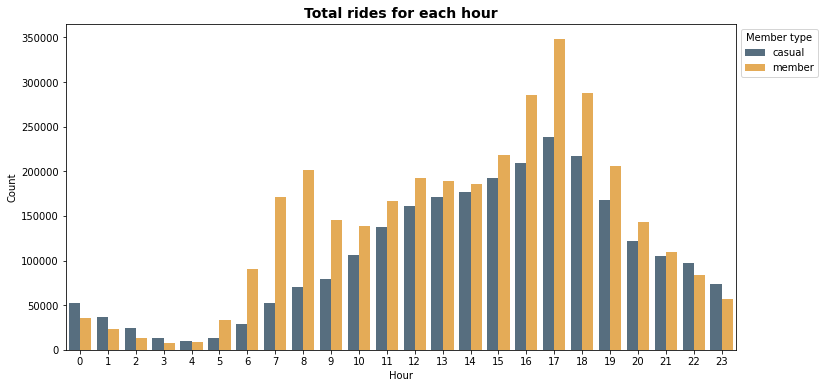

In [96]:
h = sns.barplot(data=hour_count, x='hour', y='count', hue='member_casual', palette=colors_member_casual)
h.set_title("Total rides for each hour", fontsize=14, fontweight="bold");
h.set(xlabel="Hour", ylabel="Count")
h.figure.set_size_inches(12,6)
plt.legend(title="Member type", loc = 2, bbox_to_anchor = (1,1))

In [100]:
hour_month_count = df[['hour', 'ride_length', 'int_month', 'member_casual']].groupby(['int_month', 'hour', 'member_casual'], as_index=False).agg('count')
hour_month_count.rename(columns={"ride_length": "count"}, inplace=True)

In [101]:
hour_month_count.head()

,int_month,hour,member_casual,count
0,1,0,casual,434
1,1,0,member,648
2,1,1,casual,399
3,1,1,member,456
4,1,2,casual,328


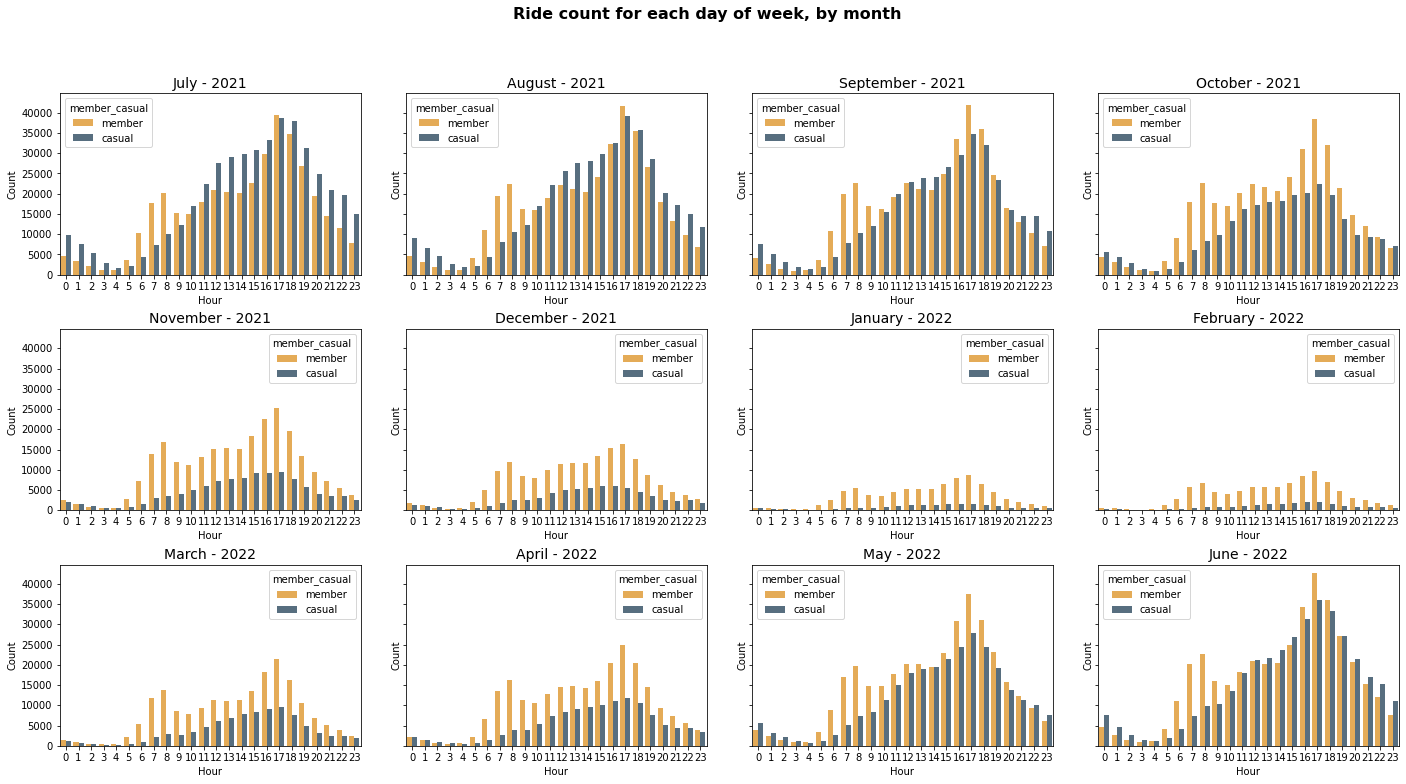

In [104]:
fig, axes = plt.subplots(3, 4, figsize=(24, 12), sharey=True) # sharex=True, 
fig.suptitle(t='Ride count for each day of week, by month', fontsize=16, fontweight="bold")
fig.subplots_adjust(hspace=0.3, wspace=0.15)
# fig.legend(labels=labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)

m = 7
year = 2021

for i in range(3):
  for j in range(4):
    month_df = hour_month_count.query(f'int_month == {m}')
    gf = sns.barplot(ax=axes[i, j], data=month_df, x='hour', y='count', hue='member_casual', hue_order=["member", "casual"], palette=colors_member_casual)
    gf.set(xlabel="Hour", ylabel="Count")
    axes[i, j].set_title(f"{month_names[m]} - {year}", fontsize=14)
    m += 1
    if m == 13:
      m = 1
      year = 2022